In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from pandas.plotting import register_matplotlib_converters
from sklearn.decomposition import PCA
from matplotlib.dates import DateFormatter
import os
import pytz
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

/Users/yagmurozdemir/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data_path = '/Users/yagmurozdemir/Desktop/hw1_files/'
input_data = pd.read_csv(os.path.join(data_path, 'hw1_input.csv'))
#imaginary part of frequency for S11 // output
hw1_img = pd.read_csv(os.path.join(data_path, 'hw1_img.csv'))
#real part of frequency for S11 // output
hw1_real = pd.read_csv(os.path.join(data_path, 'hw1_real.csv'))

## design parameters are given here for the // input
input_data

,length of patch,width of patch,height of patch,height of substrate,height of solder resist layer,radius of the probe,c_pad,c_antipad,c_probe,dielectric constant of substrate,dielectric constant of solder resist layer
0,3.202024,2.288742,0.012514,0.139247,0.041757,0.028566,0.000549,0.032403,0.348140,3.735926,4.278575
1,2.107848,2.895504,0.037171,0.149492,0.056775,0.028930,0.005536,0.053647,0.326369,4.929862,4.876068
2,3.252113,4.818411,0.025432,0.578834,0.029972,0.030922,0.020274,0.049845,0.446639,4.772670,4.745106
3,4.161509,2.294309,0.011058,0.117266,0.093223,0.017604,0.001135,0.098610,0.055665,4.102438,3.755671
4,4.820912,2.948325,0.019658,0.163503,0.094337,0.025757,0.021725,0.072813,0.272282,2.531031,3.047553
...,...,...,...,...,...,...,...,...,...,...,...
380,3.950131,5.165856,0.034389,0.770787,0.095579,0.025591,0.011430,0.048502,0.241219,4.099788,4.635040
381,2.676373,2.826965,0.011377,0.106795,0.055925,0.042376,0.005102,0.060532,0.294000,4.758303,4.205687
382,4.406785,1.814310,0.011187,0.146086,0.049041,0.040626,0.022849,0.033737,0.225794,2.826602,4.908306
383,2.540721,3.310983,0.015000,0.135650,0.082388,0.043490,0.011130,0.033451,0.370502,3.303852,4.764701


In [3]:
hw1_real ##the columns are representing the frequency levels where S-parameter is evaluated

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,0.649471,0.608623,0.563770,0.515485,0.464365,0.411022,0.356056,0.300044,0.243525,0.186992,...,-0.895451,-0.894250,-0.893045,-0.891835,-0.890620,-0.889402,-0.888178,-0.886951,-0.885718,-0.884482
1,-0.684443,-0.680926,-0.677355,-0.673727,-0.670041,-0.666296,-0.662491,-0.658624,-0.654692,-0.650696,...,-0.835303,-0.832276,-0.829209,-0.826105,-0.822965,-0.819791,-0.816584,-0.813346,-0.810078,-0.806782
2,0.670194,0.678183,0.685886,0.693294,0.700399,0.707191,0.713661,0.719799,0.725595,0.731037,...,0.693171,0.675653,0.656992,0.637113,0.615936,0.593384,0.569383,0.543870,0.516796,0.488139
3,-0.856026,-0.854962,-0.853892,-0.852815,-0.851731,-0.850642,-0.849545,-0.848442,-0.847333,-0.846217,...,-0.115205,-0.096197,-0.076456,-0.055953,-0.034660,-0.012550,0.010402,0.034219,0.058921,0.084521
4,-0.952876,-0.951901,-0.950906,-0.949892,-0.948860,-0.947811,-0.946747,-0.945668,-0.944575,-0.943469,...,-0.692349,-0.690720,-0.689088,-0.687453,-0.685813,-0.684171,-0.682524,-0.680874,-0.679221,-0.677564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,0.712664,0.703017,0.692973,0.682540,0.671727,0.660545,0.649007,0.637130,0.624930,0.612431,...,0.548479,0.560256,0.571626,0.582598,0.593180,0.603380,0.613208,0.622674,0.631789,0.640562
381,-0.304243,-0.267997,-0.229050,-0.187238,-0.142418,-0.094486,-0.043392,0.010828,0.068016,0.127852,...,-0.898600,-0.897598,-0.896590,-0.895579,-0.894562,-0.893540,-0.892514,-0.891483,-0.890447,-0.889406
382,-0.985887,-0.986109,-0.986290,-0.986434,-0.986540,-0.986612,-0.986650,-0.986656,-0.986631,-0.986577,...,-0.831635,-0.830253,-0.828863,-0.827464,-0.826056,-0.824640,-0.823215,-0.821781,-0.820338,-0.818886
383,-0.696270,-0.692488,-0.688645,-0.684740,-0.680771,-0.676737,-0.672637,-0.668469,-0.664232,-0.659923,...,-0.906488,-0.906808,-0.906959,-0.906948,-0.906784,-0.906473,-0.906022,-0.905439,-0.904728,-0.903896


In [4]:
hw1_img ##the columns are representing the frequency levels where S-parameter is evaluated

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,-0.435160,-0.493311,-0.547391,-0.597047,-0.642027,-0.682178,-0.717442,-0.747848,-0.773501,-0.794570,...,0.418737,0.421368,0.423987,0.426592,0.429186,0.431767,0.434335,0.436892,0.439437,0.441969
1,0.710936,0.714041,0.717157,0.720283,0.723419,0.726566,0.729724,0.732892,0.736070,0.739259,...,0.442050,0.449451,0.456720,0.463863,0.470884,0.477786,0.484573,0.491249,0.497816,0.504278
2,0.549842,0.537964,0.525835,0.513455,0.500828,0.487957,0.474844,0.461492,0.447904,0.434083,...,-0.518546,-0.534209,-0.549582,-0.564575,-0.579078,-0.592957,-0.606054,-0.618175,-0.629093,-0.638543
3,0.507327,0.509092,0.510857,0.512623,0.514389,0.516156,0.517923,0.519690,0.521459,0.523228,...,0.928563,0.927782,0.926488,0.924621,0.922114,0.918892,0.914873,0.909964,0.904064,0.897060
4,0.249540,0.254110,0.258618,0.263062,0.267447,0.271772,0.276041,0.280253,0.284410,0.288515,...,0.705500,0.707018,0.708531,0.710037,0.711538,0.713034,0.714523,0.716007,0.717486,0.718958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,0.020787,0.012613,0.004789,-0.002657,-0.009699,-0.016307,-0.022453,-0.028109,-0.033244,-0.037832,...,0.394561,0.391890,0.388879,0.385560,0.381963,0.378117,0.374047,0.369776,0.365325,0.360715
381,0.848685,0.853280,0.856312,0.857398,0.856077,0.851804,0.843940,0.831742,0.814364,0.790861,...,0.417166,0.419325,0.421477,0.423624,0.425764,0.427900,0.430030,0.432154,0.434274,0.436389
382,-0.008603,-0.003027,0.002469,0.007887,0.013229,0.018496,0.023691,0.028815,0.033870,0.038858,...,0.533397,0.535355,0.537310,0.539261,0.541210,0.543155,0.545097,0.547035,0.548970,0.550902
383,0.695714,0.699151,0.702599,0.706058,0.709528,0.713009,0.716500,0.720002,0.723514,0.727036,...,0.095298,0.106596,0.117713,0.128651,0.139416,0.150010,0.160438,0.170703,0.180809,0.190759


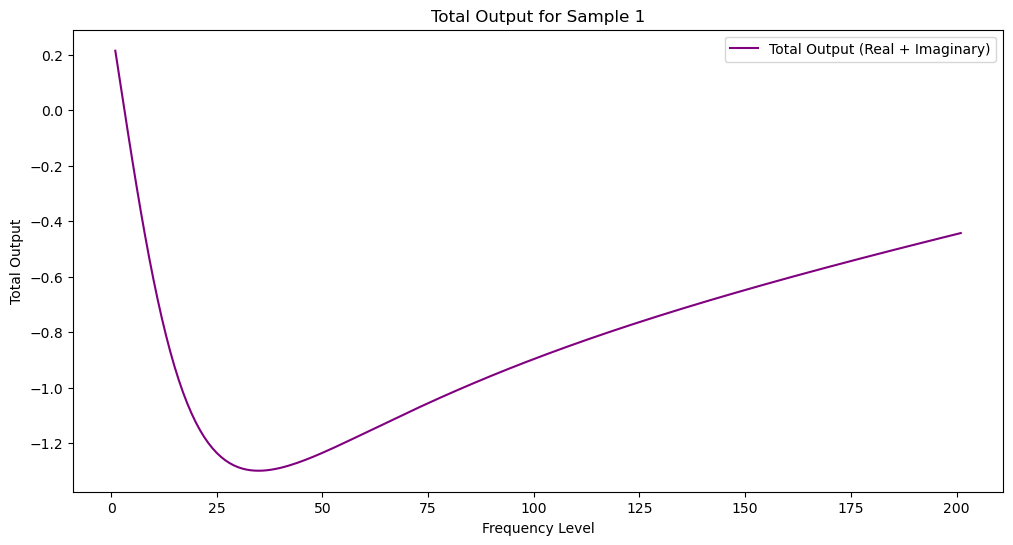

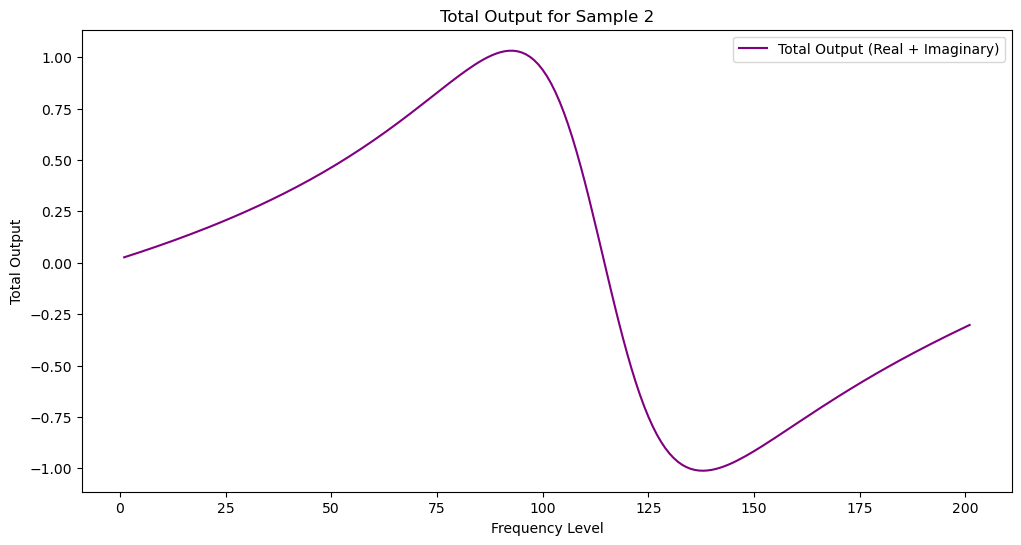

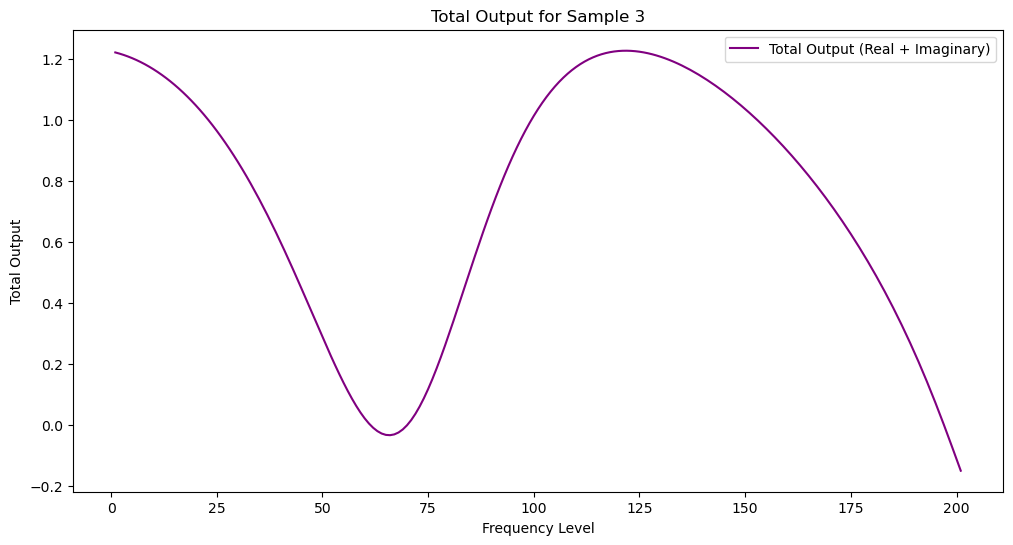

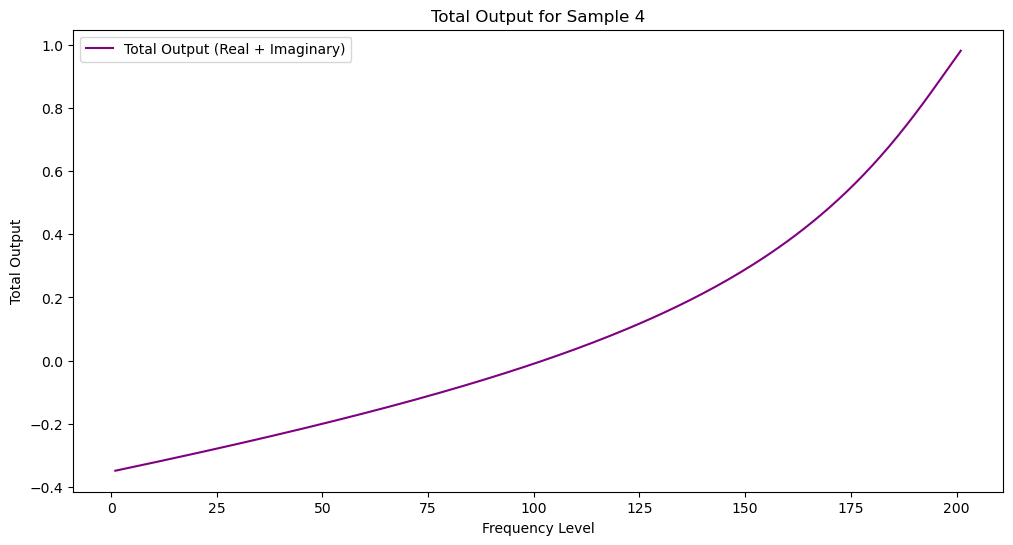

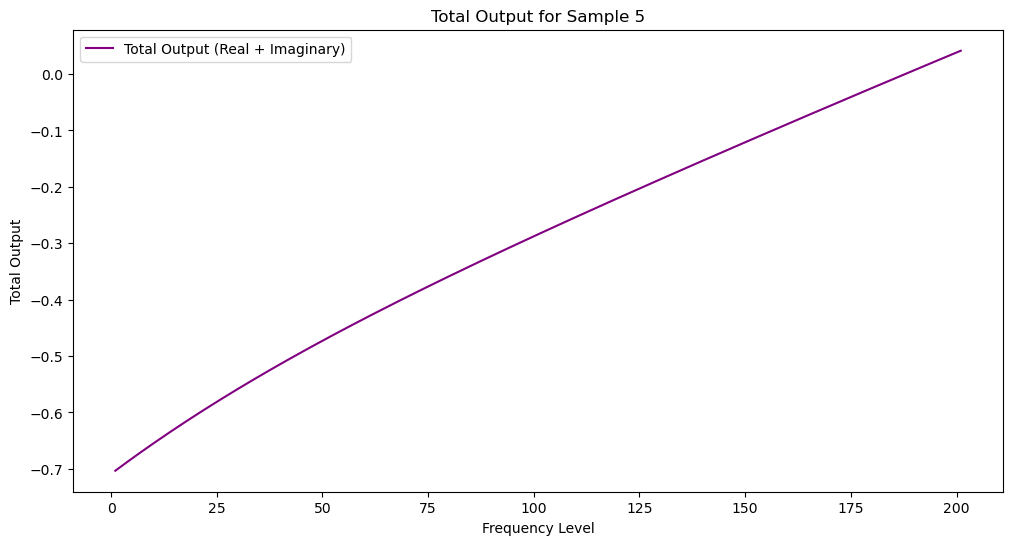

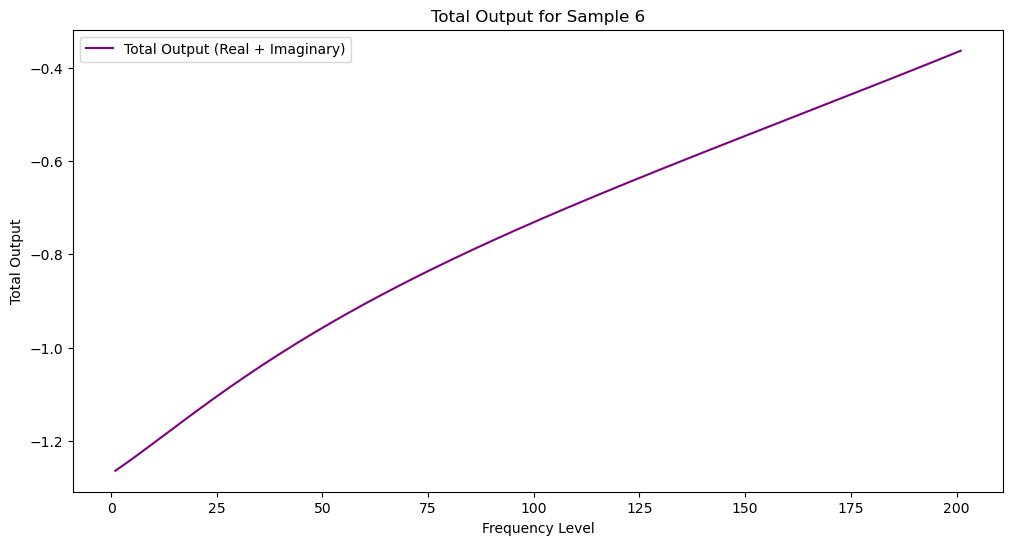

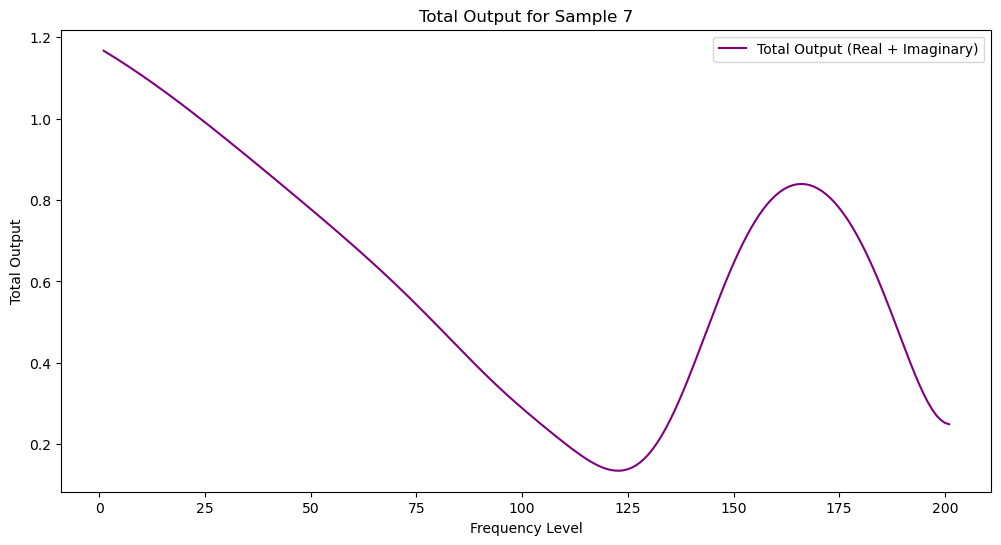

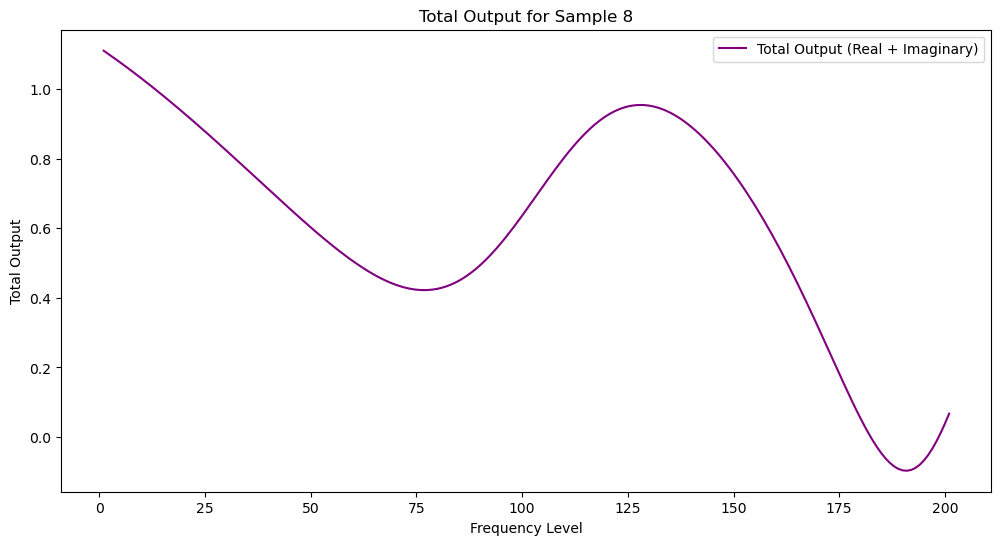

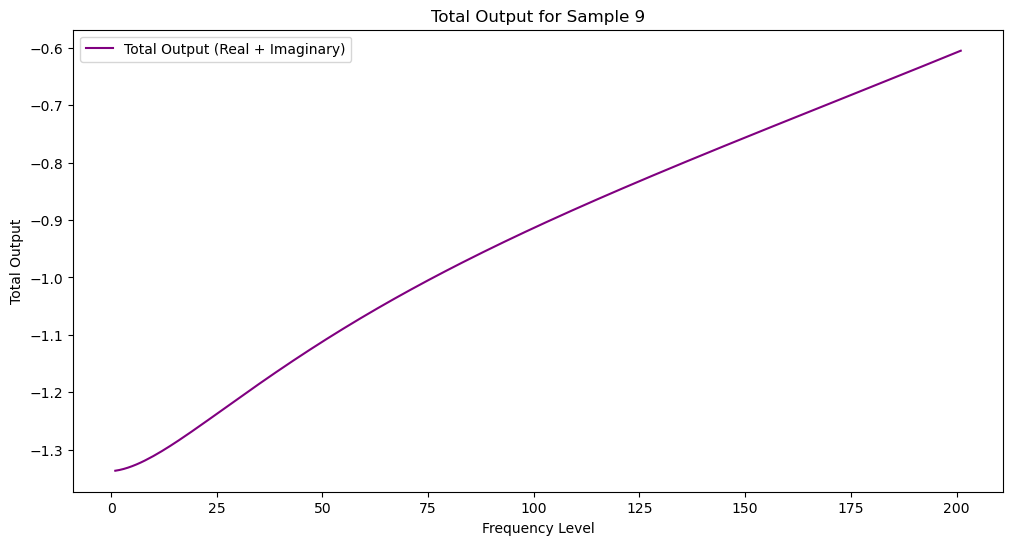

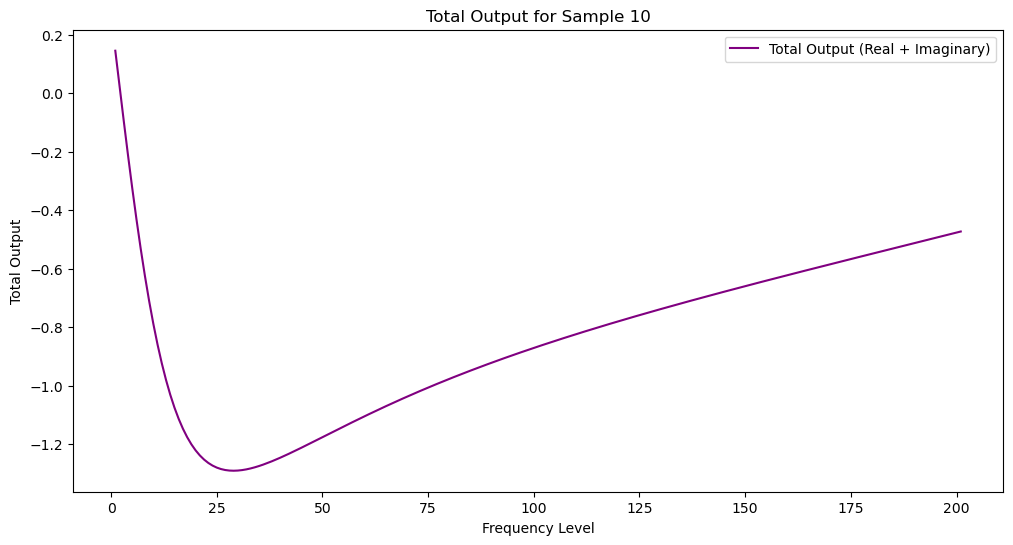

In [5]:

hw1_total = hw1_real + hw1_img

# Plotting the first 10 input samples with their corresponding total outputs
for i in range(10):
    # Plot each frequency level for sample `i`
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 202), hw1_total.iloc[i], label='Total Output (Real + Imaginary)', color='purple')
    plt.title(f'Total Output for Sample {i+1}')
    plt.xlabel('Frequency Level')
    plt.ylabel('Total Output')
    plt.legend()
    plt.show()

# 3.1. Dimensionality Reduction with PCA:


- Can we reduce the complexity of the design space by using Principal Component
Analysis (PCA) to identify key parameters that most influence the S11 response of
the antenna?
- How much of the total variance in the design parameter space can be explained by
the principal components?
- What insights can we draw from the PCA regarding the relationship between
geometry and electromagnetic behavior?

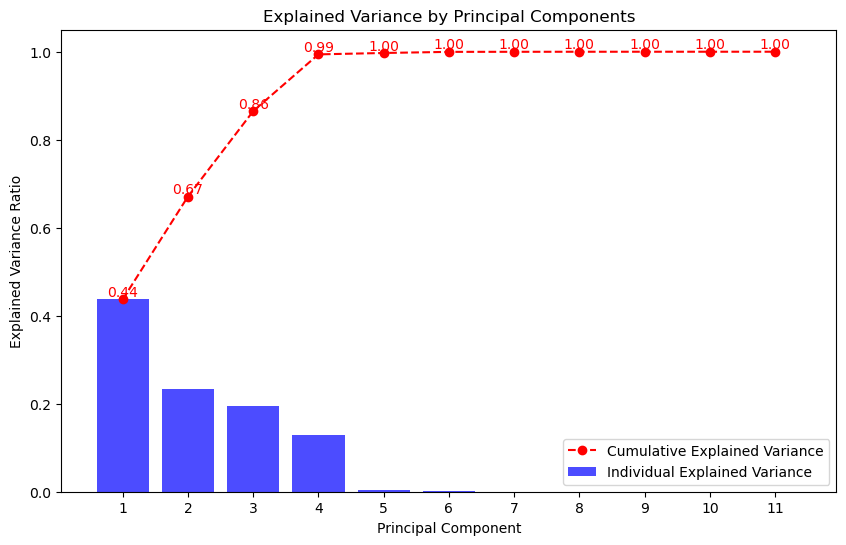

In [6]:
## applying pca for the design parameter space

from sklearn.preprocessing import StandardScaler

# firstly we will go up to 11th component to see the cumulative explained variances, 
#in order to decide on the optimal n_component parameter
n_components = 11
pca = PCA(n_components=n_components)
pca.fit(input_data)


pca_results = pca.transform(input_data)

pca_results_df = pd.DataFrame(pca_results, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

#get the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Plotting the explained variance for each principal component
plt.figure(figsize=(10, 6))

plt.bar(range(1, n_components + 1), explained_variance_ratio, alpha=0.7, label='Individual Explained Variance', color='blue')

plt.plot(range(1, n_components + 1), cumulative_variance_ratio, marker='o', linestyle='--', color='red', label='Cumulative Explained Variance')

for i, value in enumerate(cumulative_variance_ratio, start=1):
    plt.text(i, value, f"{value:.2f}", ha='center', va='bottom', fontsize=10, color='red')

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.xticks(range(1, n_components + 1))
plt.legend()
plt.show()


As can be seen from the plot above, the first 4 Principal Components are able to explain the given variance in the input data up to 99% cumulatively. Hence, the analysis will be continued with parameter n_components = 4 parameter. 

In [7]:
pca = PCA(n_components=4)
pca.fit(input_data)

eigenvalues = pca.explained_variance_

eigenvectors = pca.components_

- Eigenvalues: These are the explained variances by each principal component. 

- Eigenvectors: Each principal component has an eigenvector that represents its direction in the original feature space. We can visualize the loadings (coefficients of each feature) in each principal component.

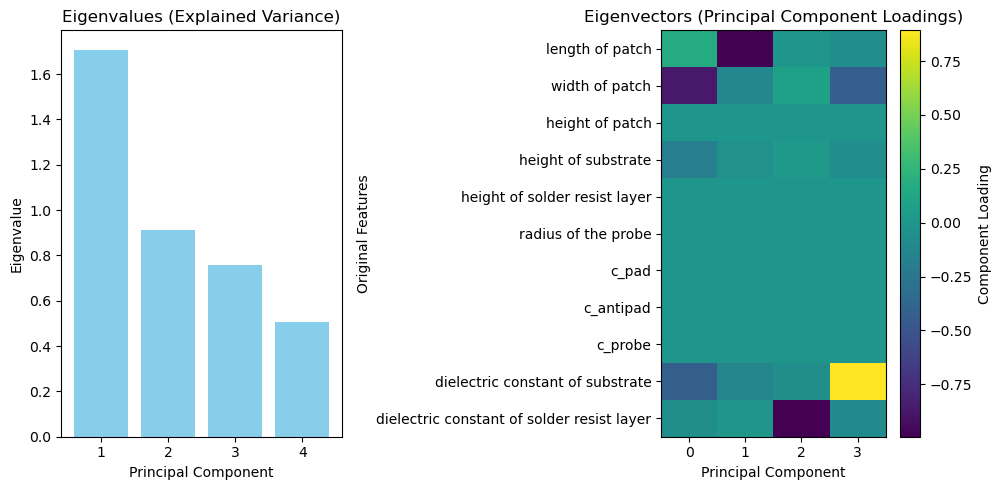

In [8]:
# Plotting the eigenvalues
plt.figure(figsize=(10, 5))

# Bar plot of eigenvalues
plt.subplot(1, 2, 1)
plt.bar(range(1, 5), eigenvalues, color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues (Explained Variance)')

# Plotting the eigenvectors as a heatmap
plt.subplot(1, 2, 2)
plt.imshow(eigenvectors.T, cmap='viridis', aspect='auto')
plt.colorbar(label='Component Loading')
plt.xlabel('Principal Component')
plt.ylabel('Original Features')
plt.title('Eigenvectors (Principal Component Loadings)')
plt.yticks(range(input_data.shape[1]), input_data.columns)  # Label features on y-axis

plt.tight_layout()
plt.show()

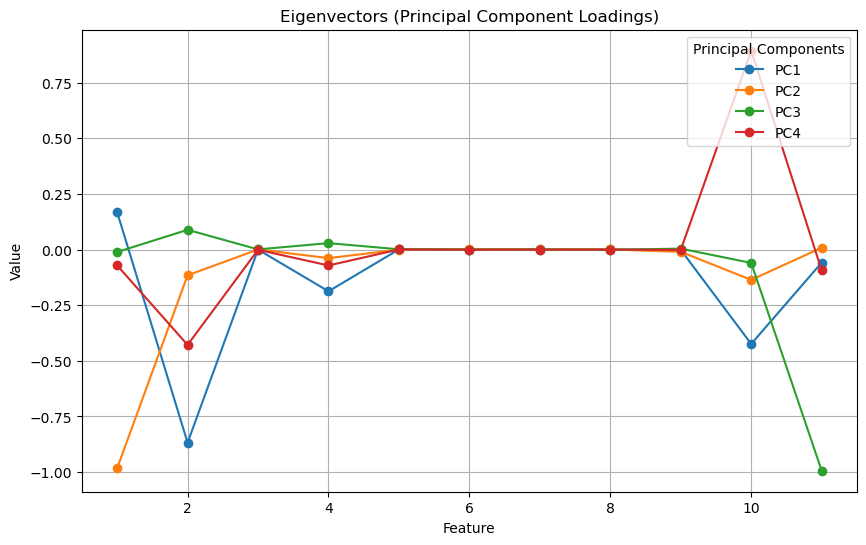

In [9]:
eigenvectors_df = pd.DataFrame(eigenvectors.T, columns=[f'PC{i+1}' for i in range(eigenvectors.shape[0])])
eigenvectors_df['Feature'] = range(1, eigenvectors.shape[1] + 1)

# Melt the DataFrame for plotting
eigenvectors_melted = eigenvectors_df.melt(id_vars='Feature', var_name='Principal Component', value_name='Value')

# Plot the data
plt.figure(figsize=(10, 6))
for pc in eigenvectors_df.columns[:-1]:  # Exclude 'Feature' column
    plt.plot(eigenvectors_df['Feature'], eigenvectors_df[pc], marker='o', label=pc)

plt.xlabel('Feature')
plt.ylabel('Value')
plt.title('Eigenvectors (Principal Component Loadings)')
plt.legend(title='Principal Components', loc='upper right')
plt.grid(True)
plt.show()

In [10]:
eigenvectors_df

,PC1,PC2,PC3,PC4,Feature
0,0.168053,-0.983008,-0.011425,-0.071336,1
1,-0.867786,-0.115849,0.088477,-0.428489,2
2,-0.000436,0.000156,0.000528,-0.001345,3
3,-0.187782,-0.038678,0.028550,-0.071745,4
4,0.000490,-0.000993,0.000970,0.000122,5
5,-0.000242,0.000729,-0.000007,-0.000695,6
6,0.000263,0.000137,-0.000145,-0.000218,7
7,0.000192,0.000322,-0.001683,-0.000455,8
8,-0.001571,-0.010400,0.004024,-0.001673,9
9,-0.424237,-0.136394,-0.060303,0.892971,10


In [11]:

eigenvectors_df['Importance'] = eigenvectors_df[[f'PC{i+1}' for i in range(eigenvectors.shape[0])]].abs().mean(axis=1)

eigenvectors_df

,PC1,PC2,PC3,PC4,Feature,Importance
0,0.168053,-0.983008,-0.011425,-0.071336,1,0.308455
1,-0.867786,-0.115849,0.088477,-0.428489,2,0.375150
2,-0.000436,0.000156,0.000528,-0.001345,3,0.000616
3,-0.187782,-0.038678,0.028550,-0.071745,4,0.081689
4,0.000490,-0.000993,0.000970,0.000122,5,0.000644
5,-0.000242,0.000729,-0.000007,-0.000695,6,0.000418
6,0.000263,0.000137,-0.000145,-0.000218,7,0.000191
7,0.000192,0.000322,-0.001683,-0.000455,8,0.000663
8,-0.001571,-0.010400,0.004024,-0.001673,9,0.004417
9,-0.424237,-0.136394,-0.060303,0.892971,10,0.378476


- Can we reduce the complexity of the design space by using Principal Component Analysis (PCA) to identify key parameters that most influence the S11 response of the antenna?


As can be seen from the above analysis, we can reduce the complexity of the design space from 11 dimensions to 4 PC components using PCA and still able to keep the variation of the data by 99%. As the remaining variation is small enough, it can be assumed that the rest is error terms and the analysis can be continued with using the new space with 4 dimensions. 

To identify the key parameters that has the most influence in the S11 response can be analysed from the dataframe right above where we see the eigenvectors' values according to features. As can be seen features # 1,2,4,9,10 and 11 has the most influence on the eigenvectors, hence the S11 response. These features are:  

- 1: length of patch
- 2: width of patch
- 3: height of substrate	
- 9: c_probe	
- 10: dielectric constant of substrate	
- 11: dielectric constant of solder resist layer

- How much of the total variance in the design parameter space can be explained by the principal components?

As given in the plot above named 'Explained Variance by Principal Components', the PC1 explains the 0.44% of the total variance, which is higher than all other components, as expected. PC2 explains the 23% of the remaining variance, PC3 explains 19% and PC4 explains additional 13% of the total variance. When we look at the cumulative variance restored in principal components, PC1,2,3 and 4 explains the 99% of the total variance. 

The remaining 1% can be explained with PC5 and PC6, however, as the 1% is probably the variance from the error terms, so, rest of the analysis will continue with the first 4 principal components. 

- What insights can we draw from the PCA regarding the relationship between geometry and electromagnetic behavior?

From the PCA, we gain valuable insights into how specific geometric features influence the electromagnetic performance, specifically the S11 response, of the antenna. By reducing the dimensionality of the design space, PCA highlights a subset of parameters that account for the majority of variance in the data, indicating they are the most influential in shaping the antenna’s S11 behavior. 

Notably, features like the length and width of the patch, height of the substrate, c_probe and dielectric constants play pivotal roles. This suggests that variations in these geometric and material properties significantly affect how the antenna reflects or radiates signals within the specified frequency range.

PCA also reveals that a substantial portion of the design’s variability can be captured with only a few principal components, reducing complexity without sacrificing much information. This indicates that the S11 response is strongly influenced by specific combinations of geometric parameters, underscoring an inherent structure in the relationship between geometry and electromagnetic behavior.


# 3.2. Regression Modeling for S11

- Given that S11 parameters are evaluated at 201 frequency points, predicting them simultaneously through multitarget regression may be computationally intensive and beyond the scope of the content covered so far. Instead, can we simplify the regression task by focusing on predicting S11 at a few key frequency points? For instance, selecting frequencies of interest where the behavior is most critical (e.g., resonance frequencies) can reduce the complexity of the task.

- How effective are linear regression models in predicting the real and imaginary components of S11 at these selected frequency points, based on the geometric parameters of the antenna design?

- What patterns emerge when linear regression is applied to individual frequency points, and do these patterns suggest any broader trends in the design space?

/var/folders/ff/x1vnwffx7w54w1yt78lv97gm0000gn/T/ipykernel_3650/2764969275.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(resonance_indices, mean_magnitude[resonance_indices], color='r', marker='o', label='Resonance Frequencies')


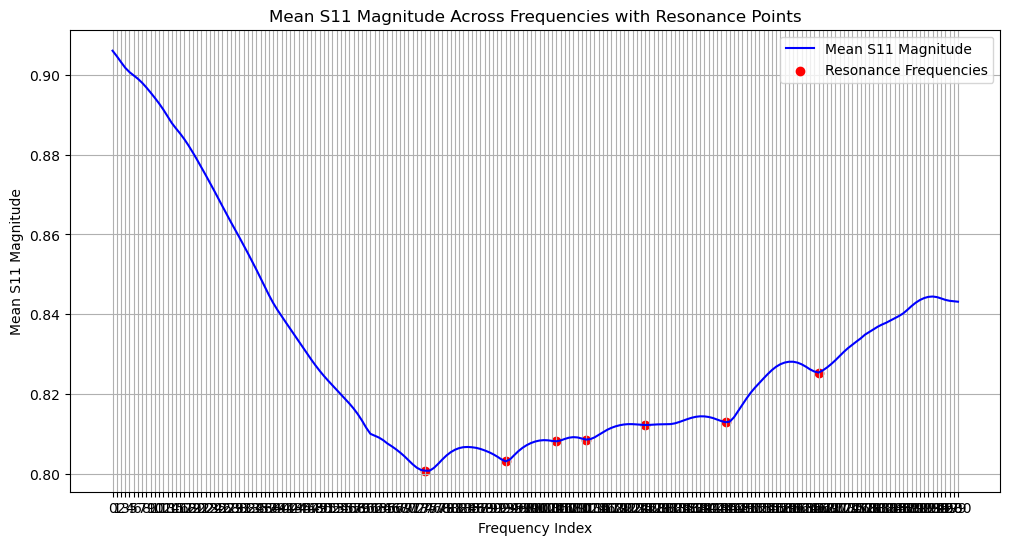

In [12]:
from scipy.signal import find_peaks


hw1_magnitude = (hw1_real**2 + hw1_img**2)**0.5  # Using Pythagorean theorem for magnitude

# mean S11 magnitude across all designs for each frequency
mean_magnitude = hw1_magnitude.mean(axis=0)

resonance_indices, _ = find_peaks(-mean_magnitude)  # Negative for minima

#Plotting the mean S11 magnitude with resonance frequencies highlighted
plt.figure(figsize=(12, 6))
plt.plot(mean_magnitude, label='Mean S11 Magnitude', color='b')
plt.scatter(resonance_indices, mean_magnitude[resonance_indices], color='r', marker='o', label='Resonance Frequencies')
plt.xlabel('Frequency Index')
plt.ylabel('Mean S11 Magnitude')
plt.title('Mean S11 Magnitude Across Frequencies with Resonance Points')
plt.legend()
plt.grid(True)
plt.show()

- Given that S11 parameters are evaluated at 201 frequency points, predicting them simultaneously through multitarget regression may be computationally intensive and beyond the scope of the content covered so far. Instead, can we simplify the regression task by focusing on predicting S11 at a few key frequency points? For instance, selecting frequencies of interest where the behavior is most critical (e.g., resonance frequencies) can reduce the complexity of the task.


'Smaller magnitudes indicate less signal loss, meaning a stronger reflection performance. In the case of S11, a smaller magnitude implies that the signal can be received more effectively around that frequency.'
 
Using this information, above plot shows the mean of the S11 magnitude across frequences. And, the local minima points (frequencies that has smaller magnitudes) indicate the points which are expected to receive more effective signals. 

Hence, for the rest of this analysis, only these resonance points (which are shown in the plot above) will be analyzed for simplification.





In [13]:
## as can be seen from the table below, 
## focusing on the resonance frequencies decreases the number of columns significantly

resonance_s11 = hw1_magnitude.iloc[:, resonance_indices]  # S11 values at resonance frequencies

resonance_s11

,74,93,105,112,126,145,167
0,0.969927,0.977055,0.980004,0.981377,0.983576,0.985734,0.987420
1,0.900373,0.752903,0.564210,0.480983,0.612122,0.823446,0.911361
2,0.210247,0.663837,0.800886,0.846984,0.897291,0.919197,0.912619
3,0.992192,0.990941,0.989941,0.989236,0.987398,0.983227,0.972482
4,0.988659,0.988955,0.989162,0.989278,0.989473,0.989588,0.989361
...,...,...,...,...,...,...,...
380,0.675278,0.765808,0.784701,0.786535,0.754762,0.499718,0.294489
381,0.969688,0.980198,0.983746,0.985238,0.987401,0.989206,0.990305
382,0.990075,0.990274,0.990373,0.990417,0.990455,0.990325,0.989698
383,0.906692,0.813976,0.709919,0.639653,0.575706,0.716027,0.849738


In [14]:
# however, we also decreased the number of parameters from 11 to 4 with the help of the PCA

#dropping the pc columns after PC4 as we have decided to use the first 4 components explaining the 99% of the variance
columns_to_drop = [col for col in pca_results_df.columns if col.startswith('PC') and int(col[2:]) >= 5]

pca_results_df = pca_results_df.drop(columns=columns_to_drop)


pca_results_df

,PC1,PC2,PC3,PC4
0,1.002548,0.514384,-0.865605,0.533217
1,-0.251433,1.361501,-1.464990,1.360774
2,-1.734231,0.016461,-1.155593,0.296096
3,1.038875,-0.479818,-0.380400,0.840658
4,1.281438,-0.999235,0.470634,-0.827262
...,...,...,...,...
380,-1.662192,-0.624419,-0.978144,-0.506563
381,0.023898,0.830538,-0.802379,1.262265
382,1.964341,-0.484797,-1.492612,-0.220667
383,0.159680,1.108779,-1.224621,-0.288742


In [15]:
# Define the indices for resonance frequencies of interest
resonance_indices = [74, 93, 105, 112, 126, 145, 167]

# Select only the columns with specified indices from hw1_real
real_values_at_resonance_points = hw1_real.iloc[:, resonance_indices]

img_values_at_resonance_points = hw1_img.iloc[:, resonance_indices]

real_values_at_resonance_points

,74,93,105,112,126,145,167
0,-0.965794,-0.976053,-0.973655,-0.970440,-0.961325,-0.945129,-0.922839
1,-0.070688,0.376827,0.550693,0.402837,-0.303062,-0.809094,-0.886550
2,-0.078126,0.222674,0.490643,0.614556,0.787787,0.901686,0.902026
3,-0.755431,-0.718520,-0.690963,-0.672866,-0.630737,-0.554780,-0.416342
4,-0.861573,-0.836334,-0.820088,-0.810475,-0.790905,-0.763498,-0.730369
...,...,...,...,...,...,...,...
380,0.552329,0.708953,0.761408,0.777153,0.753056,0.443362,0.192468
381,-0.969668,-0.973032,-0.968101,-0.964126,-0.954763,-0.940165,-0.921348
382,-0.951916,-0.936573,-0.926182,-0.919869,-0.906649,-0.887295,-0.862452
383,-0.078077,0.313846,0.562850,0.623746,0.351104,-0.400429,-0.815625


In [16]:
img_values_at_resonance_points


,74,93,105,112,126,145,167
0,-0.089441,0.044252,0.111380,0.146109,0.208032,0.280005,0.351237
1,0.897593,0.651817,0.122762,-0.262807,-0.531833,-0.153071,0.211204
2,0.195193,0.625376,0.632999,0.582841,0.429560,0.178564,-0.138647
3,0.643248,0.682417,0.708910,0.725148,0.759689,0.811760,0.878852
4,0.484910,0.527805,0.553080,0.567274,0.594581,0.629568,0.667380
...,...,...,...,...,...,...,...
380,0.388501,0.289563,0.189770,0.121124,-0.050715,-0.230540,0.222889
381,-0.006237,0.118307,0.174746,0.202867,0.251771,0.307599,0.363072
382,0.272223,0.321674,0.350749,0.367107,0.398735,0.439831,0.485467
383,0.903324,0.751038,0.432648,0.141765,-0.456249,-0.593591,-0.238350


In [17]:
pca_with_real_part = pd.concat([pca_results_df, img_values_at_resonance_points], axis=1)
pca_with_real_part.columns = list(pca_results_df.columns) + list(img_values_at_resonance_points.columns)
pca_with_real_part

,PC1,PC2,PC3,PC4,74,93,105,112,126,145,167
0,1.002548,0.514384,-0.865605,0.533217,-0.089441,0.044252,0.111380,0.146109,0.208032,0.280005,0.351237
1,-0.251433,1.361501,-1.464990,1.360774,0.897593,0.651817,0.122762,-0.262807,-0.531833,-0.153071,0.211204
2,-1.734231,0.016461,-1.155593,0.296096,0.195193,0.625376,0.632999,0.582841,0.429560,0.178564,-0.138647
3,1.038875,-0.479818,-0.380400,0.840658,0.643248,0.682417,0.708910,0.725148,0.759689,0.811760,0.878852
4,1.281438,-0.999235,0.470634,-0.827262,0.484910,0.527805,0.553080,0.567274,0.594581,0.629568,0.667380
...,...,...,...,...,...,...,...,...,...,...,...
380,-1.662192,-0.624419,-0.978144,-0.506563,0.388501,0.289563,0.189770,0.121124,-0.050715,-0.230540,0.222889
381,0.023898,0.830538,-0.802379,1.262265,-0.006237,0.118307,0.174746,0.202867,0.251771,0.307599,0.363072
382,1.964341,-0.484797,-1.492612,-0.220667,0.272223,0.321674,0.350749,0.367107,0.398735,0.439831,0.485467
383,0.159680,1.108779,-1.224621,-0.288742,0.903324,0.751038,0.432648,0.141765,-0.456249,-0.593591,-0.238350


In [18]:
pca_with_img_part = pd.concat([pca_results_df, real_values_at_resonance_points], axis=1)
pca_with_img_part.columns = list(pca_results_df.columns) + list(real_values_at_resonance_points.columns)
pca_with_img_part

,PC1,PC2,PC3,PC4,74,93,105,112,126,145,167
0,1.002548,0.514384,-0.865605,0.533217,-0.965794,-0.976053,-0.973655,-0.970440,-0.961325,-0.945129,-0.922839
1,-0.251433,1.361501,-1.464990,1.360774,-0.070688,0.376827,0.550693,0.402837,-0.303062,-0.809094,-0.886550
2,-1.734231,0.016461,-1.155593,0.296096,-0.078126,0.222674,0.490643,0.614556,0.787787,0.901686,0.902026
3,1.038875,-0.479818,-0.380400,0.840658,-0.755431,-0.718520,-0.690963,-0.672866,-0.630737,-0.554780,-0.416342
4,1.281438,-0.999235,0.470634,-0.827262,-0.861573,-0.836334,-0.820088,-0.810475,-0.790905,-0.763498,-0.730369
...,...,...,...,...,...,...,...,...,...,...,...
380,-1.662192,-0.624419,-0.978144,-0.506563,0.552329,0.708953,0.761408,0.777153,0.753056,0.443362,0.192468
381,0.023898,0.830538,-0.802379,1.262265,-0.969668,-0.973032,-0.968101,-0.964126,-0.954763,-0.940165,-0.921348
382,1.964341,-0.484797,-1.492612,-0.220667,-0.951916,-0.936573,-0.926182,-0.919869,-0.906649,-0.887295,-0.862452
383,0.159680,1.108779,-1.224621,-0.288742,-0.078077,0.313846,0.562850,0.623746,0.351104,-0.400429,-0.815625


In [19]:
## now our data is ready for the linear regression:

# Assuming your dataframe with PCA components and S11 data is 'pca_results_df'
# Assuming your real and imaginary S11 parts are stored in 'real_part_df' and 'imaginary_part_df'

# Features: PCA components
X = pca_with_real_part[['PC1', 'PC2', 'PC3', 'PC4']]

# Targets: Real and imaginary parts of S11 
y_real = pca_with_real_part[['74', '93', 
                       '105', '112', 
                       '126', '145', 
                       '167']]


y_img = pca_with_img_part[['74', '93', 
                       '105', '112', 
                       '126', '145', 
                       '167']]

#model for the real part
real_model = LinearRegression()
real_model.fit(X, y_real)
#model for the imaginary part

img_model = LinearRegression()
img_model.fit(X, y_img)

LinearRegression()

In [20]:
#predict the real and imginary parts of S11
y_real_pred = real_model.predict(X)
y_img_pred = img_model.predict(X)

#MSE and R2 for the real part
mse_real = mean_squared_error(y_real, y_real_pred)
r2_real = r2_score(y_real, y_real_pred)

#MSE and R2 for the imaginary part
mse_img = mean_squared_error(y_img, y_img_pred)
r2_img = r2_score(y_img, y_img_pred)

print("Real Part - MSE:", mse_real, "R2:", r2_real)
print("Imaginary Part - MSE:", mse_img, "R2:", r2_img)

Real Part - MSE: 0.10085327508171169 R2: 0.14285858185533185
Imaginary Part - MSE: 0.1146923188472561 R2: 0.7190145614983907


- How effective are linear regression models in predicting the real and imaginary components of S11 at these selected frequency points, based on the geometric parameters of the antenna design?


We used geometry and PCA to reduce the original 11 features to 4 principal components, simplifying the model while retaining essential information. This dimensionality reduction appears to capture the geometric factors that influence the imaginary part of S11 at the frequency points more effectively, as reflected in the higher R² of 0.72 for the imaginary component. 

In contrast, the real component is not as well explained at the frequency points by this geometric representation, yielding a lower R² of 0.14, suggesting that further refinement or additional features may be necessary to improve predictions for the real part.

In [21]:
## applying linear regression to individual frequency points 
frequency_points = ['74', '93', '105', '112', '126', '145', '167']

results = []

#loop over each frequency point
for freq in frequency_points:
    #set the target (Y) for real and imaginary parts at the current frequency
    y_real = pca_with_real_part[[freq]]
    y_img = pca_with_img_part[[freq]]
    
    real_model = LinearRegression()
    real_model.fit(X, y_real)
    y_real_pred = real_model.predict(X)
    
    img_model = LinearRegression()
    img_model.fit(X, y_img)
    y_img_pred = img_model.predict(X)
    
    mse_real = mean_squared_error(y_real, y_real_pred)
    r2_real = r2_score(y_real, y_real_pred)
    
    mse_img = mean_squared_error(y_img, y_img_pred)
    r2_img = r2_score(y_img, y_img_pred)
    
    results.append({
        'Frequency': freq,
        'MSE_Real': mse_real,
        'R2_Real': r2_real,
        'MSE_Imaginary': mse_img,
        'R2_Imaginary': r2_img
    })

results_df = pd.DataFrame(results)

results_df

,Frequency,MSE_Real,R2_Real,MSE_Imaginary,R2_Imaginary
0,74,0.096526,0.153833,0.129111,0.704834
1,93,0.094647,0.156065,0.130518,0.689464
2,105,0.098390,0.152541,0.120873,0.704163
3,112,0.100415,0.143908,0.117974,0.708118
4,126,0.108484,0.129586,0.104244,0.733658
5,145,0.106600,0.116112,0.101261,0.741189
6,167,0.100911,0.147965,0.098866,0.751676


- What patterns emerge when linear regression is applied to individual frequency points, and do these patterns suggest any broader trends in the design space?


The results reveal a noticeable trend: as frequency increases, both the real and imaginary components show slight improvements in model performance, with generally decreasing MSE values and higher R² scores. This suggests that the PCA-transformed geometric features are increasingly effective at explaining the S11 response at higher frequencies.

Another pattern is the consistently better performance for the imaginary component over the real component across all frequency points. This indicates that the geometric parameters of the antenna, captured by the PCA components, have a stronger relationship with the imaginary part of S11, likely due to the physical characteristics of the design that affect reactance or impedance, which is often tied to imaginary values.

In terms of broader trends, these patterns suggest that the chosen geometric features and PCA-based dimensionality reduction capture essential design attributes more effectively at higher frequencies and for the imaginary part of S11. This insight could inform future antenna design, emphasizing feature selection and model adjustments for different frequency bands, with an understanding that higher frequencies may yield better predictive performance for both real and imaginary S11 responses.

# 3.3 Model Performance and Interpretability:

- How do PCA and regression models compare in terms of their ability to simplify and predict the antenna's performance?

In simplifying and predicting the antenna’s performance, PCA and regression models complement each other well. PCA effectively reduces the complexity of the design space (simplifying the problem), capturing the most influential geometric parameters with only 4 principal components while retaining 99% of the variance. 

This, enables a streamlined analysis and focuses the regression model on the critical features that impact the antenna’s S11 response, especially for the imaginary part at higher frequencies. Linear regression provides insights into the strength of the relationship between these components and the S11 response, showing moderate success for the imaginary part but limited predictive power for the real part.

- What are the potential limitations of these models, and how could they be improved to more accurately represent complex, nonlinear electromagnetic behavior?

PCA is a linear process which assumes that the most significant information is contained within linear combinations of the original features. However, in complex electromagnetic systems like antennas, certain interactions between design parameters may be highly nonlinear, and these may not be fully captured by PCA alone. Additionally, linear regression assumes a linear relationship between features and the target variables, which may not account for the complex ways in which antenna geometry affects the S11 response, particularly for the real part.

To improve accuracy, incorporating nonlinear models, such as polynomial regression or machine learning algorithms, could better represent these complex and nonlinear relationships. These approaches could enhance the model’s ability to represent the true electromagnetic behavior, especially for the real component, where a more sophisticated approach may be required to achieve high accuracy.



# Conclusion

In summary, PCA and linear regression have proven effective in simplifying and analyzing the antenna design space, especially for the imaginary component of S11 at higher frequencies. 

By reducing the dimensionality of the data from 11 features to 4 principal components, PCA retains nearly all the data variance, effectively identifying the primary geometric factors influencing the S11 response. 

The linear regression model, when applied to the transformed data, achieves higher R² values for the imaginary part, indicating that the geometric parameters captured by PCA align well with the imaginary component’s electromagnetic behavior. 

Although the real component predictions are less accurate, this analysis demonstrates the power of PCA and linear regression in providing insight into antenna performance with a simplified, interpretable model. Future work can build on this foundation by exploring nonlinear methods to enhance predictive accuracy, particularly for more complex aspects of the antenna’s response.